In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

In [2]:
df = pd.read_csv(r'C:\Users\Data\dataset\DATA\iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
plt.style.use(['science','notebook','grid'])

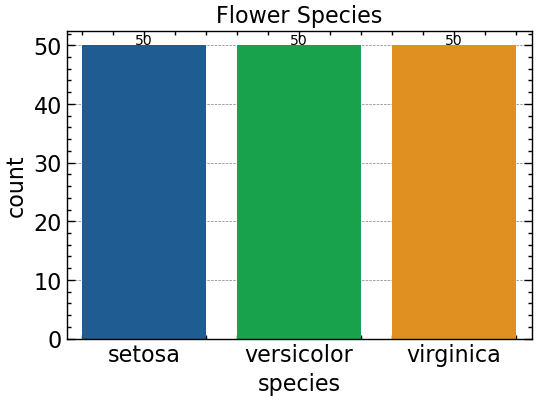

In [13]:
fig = plt.figure(figsize=(6,4), dpi=100)
ax = sns.countplot(x='species', data= df)

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2, 
            y = height + 0.2 , 
            s = '{:.0f}'.format(height), 
            ha = 'center')
plt.title('Flower Species')
plt.show();

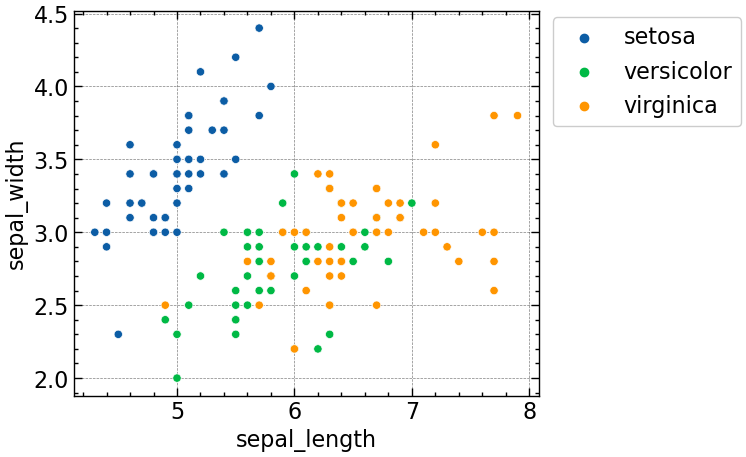

In [16]:
plt.figure(figsize=(6, 5), dpi=100)
sns.scatterplot(x='sepal_length', y='sepal_width', data=df, hue='species')
plt.legend(loc=(1.03, 0.7));

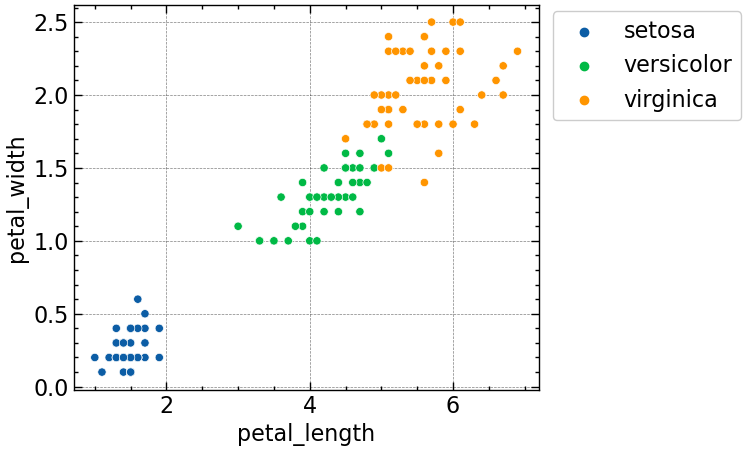

In [17]:
plt.figure(figsize=(6,5), dpi=100)
sns.scatterplot(x='petal_length', y='petal_width', data=df, hue='species')
plt.legend(loc=(1.03, 0.7));

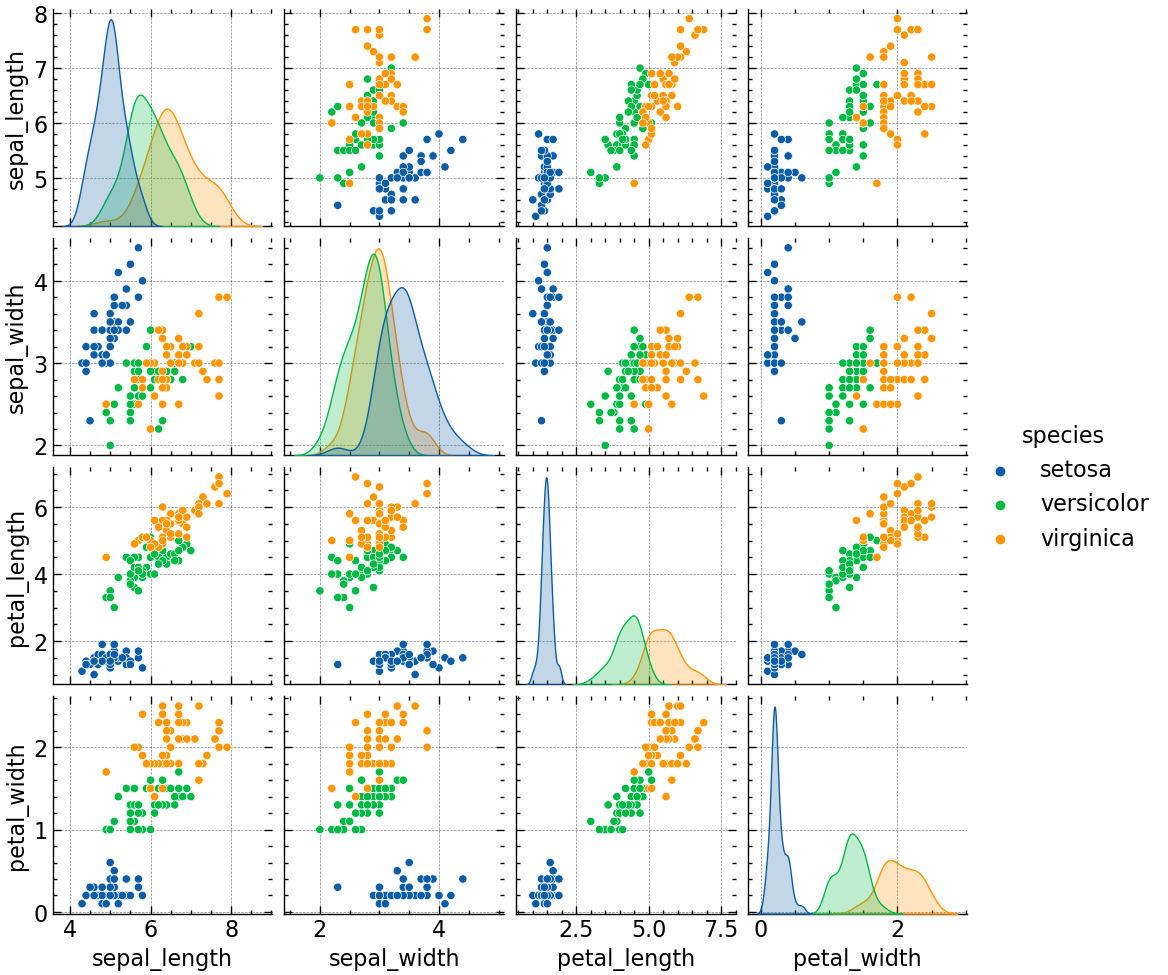

In [18]:
sns.pairplot(df, hue='species');

In [22]:
plt.style.use('default')

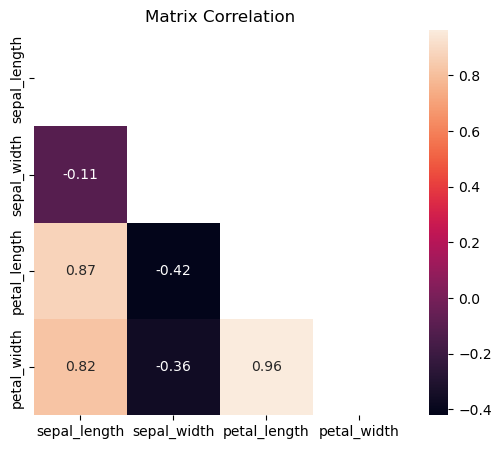

In [23]:
# matric
matrix = df.corr()

# mask
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(matrix)]=True

plt.figure(figsize=(6,5), dpi=100)
sns.heatmap(matrix, mask =mask, annot =True)
plt.title('Matrix Correlation');

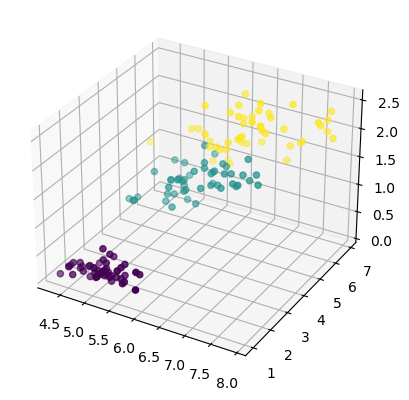

In [32]:
fig =plt.figure()

ax = fig.add_subplot(111, projection='3d')
colors = df['species'].map({'setosa': 0, 'versicolor':1, 'virginica': 2})
ax.scatter(df['sepal_length'], df['petal_length'], df['petal_width'], c=colors);

## Split data

In [33]:
X = df.drop('species', axis =1)
y = df['species']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =101)

## Scaler data

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
scaler_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.transform(X_test)

## Create Model Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [46]:
log_model = LogisticRegression(solver='saga',multi_class='ovr',  max_iter = 500)

----
----
## Hyperparameter Tuning GridSearchCV

In [51]:
penalty = ['l1', 'l2']

C = np.logspace(0, 4, 10)

In [52]:
from sklearn.model_selection import GridSearchCV

In [58]:
grid_model = GridSearchCV(log_model, param_grid ={'penalty': penalty, 'C':C})

In [59]:
grid_model.fit(scaler_X_train, y_train)

C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: T

C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: T

C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: T

GridSearchCV(estimator=LogisticRegression(max_iter=500, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [60]:
grid_model.best_params_

{'C': 7.742636826811269, 'penalty': 'l1'}

## Prediction

In [65]:
y_pred = grid_model.predict(scaler_X_test)

---
## Model Perfomed on classification task

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [66]:
accuracy_score(y_test, y_pred)

0.9736842105263158

In [67]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]], dtype=int64)

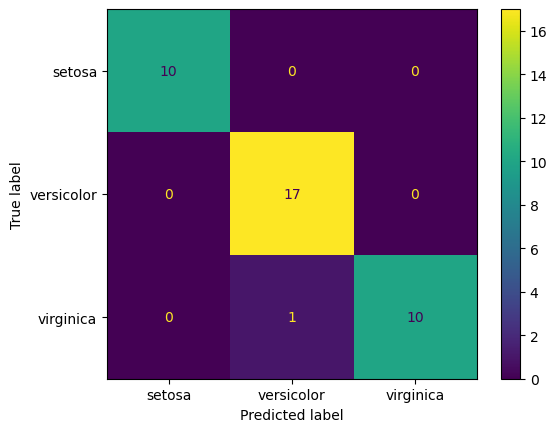

In [74]:
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= grid_model.classes_).plot();

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



----
## Evaluation Curve and AUC

In [88]:
from sklearn.metrics import roc_curve, auc

In [89]:
def plot_multiclas_auc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)
    
    # structur
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    
    for i in range(n_classes):
        fpr[i], tpf[i], _ = roc_auc( y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()
    
    

In [112]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

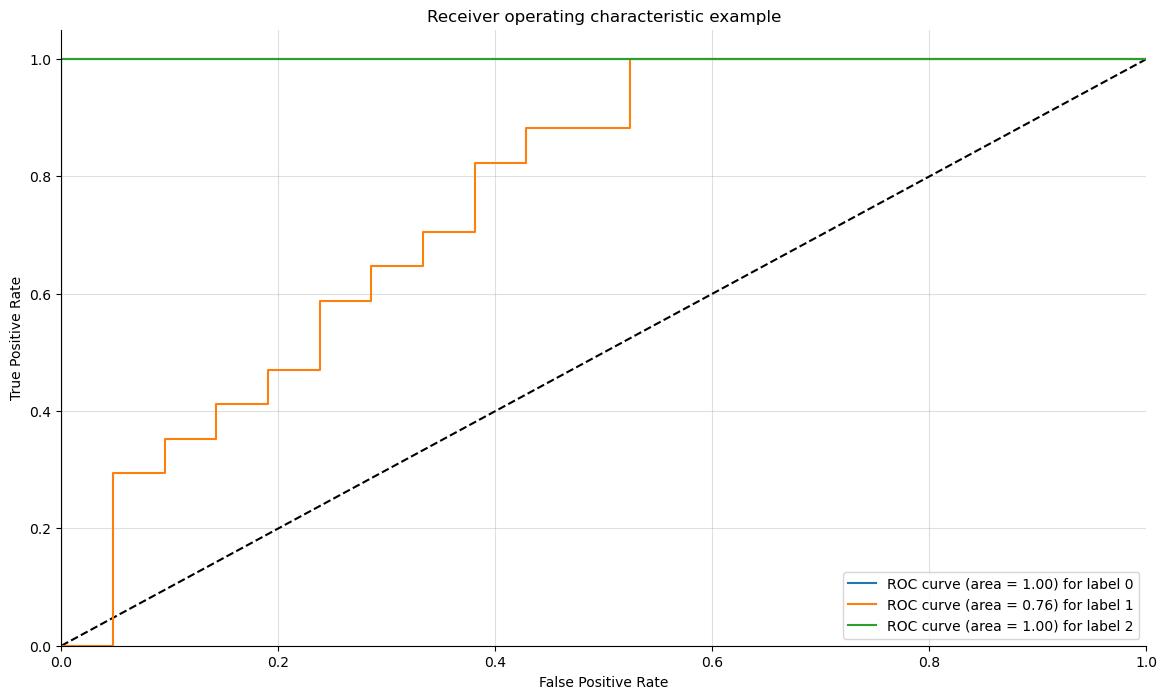

In [113]:
plot_multiclass_roc(grid_model, scaler_X_test, y_test, n_classes=3, figsize=(14,8))

## Evaluation Curve and AUC

In [114]:
from sklearn.metrics import roc_curve, auc

In [128]:
def plot_multiclass_roc(clf , X_test, y_test, n_classes, figsize=(6,5)):
    y_score = clf.decision_function(X_test)
    
    # sturctur
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    # menghitung dummies 
    y_test_dummies = pd.get_dummies(y_test, drop_first= False).values
    # n_classes
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
        
        
        
    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0,1], [0,1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True positive Rate')
    ax.set_title('Reciver operatin Character example')
    # classes
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    plt.legend(loc='best')
    plt.grid(alpha=.4)
    sns.despine()
    plt.show()
    

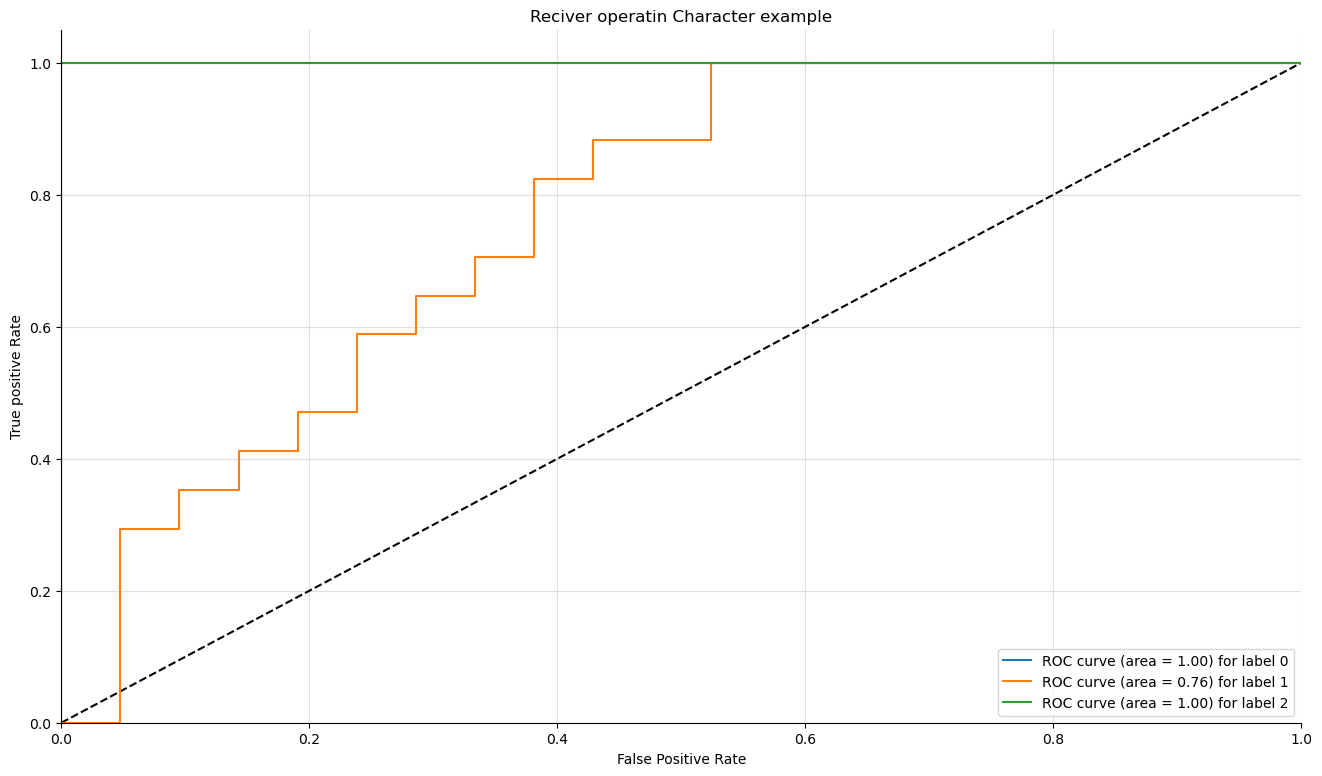

In [130]:
plot_multiclass_roc(grid_model, scaler_X_test, y_test, n_classes=3, figsize=(16, 9));